In [ ]:
#Download files from kaggle to aws
# !ssh ubuntu@myaws

In [2]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import joblib
import matplotlib.pyplot as plt

In [12]:
def import_zipfiles_to_df(path):
    """
    import multiple zipfiles and combine into one dataframe
    path = where the file located
    """
    path = path
    zip_file = ZipFile(path)
    files = zip_file.infolist()
    files.pop(0) #remove first item (folder name)

    #create first dataframe to append later
    file1 = files.pop(0)
    df= pd.read_csv(zip_file.open(file1.filename),dtype = 'object') 

    #add block column = file name
    name = file1.filename.split('/')[1]
    name = name.split('.')[0]
    df['block'] = name

    for file in files:
#         print(file.filename)
        df_1= pd.read_csv(zip_file.open(file.filename), dtype = 'object')
        name = file.filename.split('/')[1]
        name = name.split('.')[0]
        df_1['block'] = name
        df = pd.concat([df, df_1])
    return df

In [38]:
#pcike function
def pickleFile(filetopickle, file_path):
        
    joblib.dump(filetopickle, file_path)
 
    return print('File is picked at below path: \n', file_path)

In [4]:
#load pickle file
def loadpickle(file_path):
    
    return joblib.load(file_path)  

In [13]:
# import data
folder_path = '/Users/vsu/Metis/04_Metis_Projects/05_Project05/Data/smart-meters-in-london'

for file in os.listdir(folder_path):
    if str(file).endswith(('csv', 'zip')):
        
        file_name = str(file).split('.')[0] + '_df'
        path = folder_path + '/' + file
        
        if str(file).split('.')[-1]!='csv': #.zip and .gz files
            locals()[file_name] = import_zipfiles_to_df(path)


        else: #.csv files
            locals()[file_name]= pd.read_csv(path, dtype= 'object' )

In [14]:
%whos

Variable                     Type         Data/Info
---------------------------------------------------
ZipFile                      type         <class 'zipfile.ZipFile'>
acorn_details_df             DataFrame        MAIN CATEGORIES      <...>\n[826 rows x 20 columns]
daily_dataset_df             DataFrame               LCLid         <...>510433 rows x 10 columns]
file                         str          weather_hourly_darksky.csv
file_name                    str          weather_hourly_darksky_df
folder_path                  str          /Users/vsu/Metis/04_Metis<...>ta/smart-meters-in-london
halfhourly_dataset_df        DataFrame                 LCLid       <...>7817021 rows x 4 columns]
hhblock_dataset_df           DataFrame               LCLid         <...>469352 rows x 51 columns]
import_zipfiles_to_df        function     <function import_zipfiles_to_df at 0x3d5cd0950>
informations_households_df   DataFrame              LCLid stdorToU <...>\n[5566 rows x 5 columns]
np           

In [317]:
# #pickle add dataframes
# pickleFile(acorn_details_df, './Pickle/acorn_details.pickle')
# pickleFile(daily_dataset_df, './Pickle/daily_dataset.pickle')
# pickleFile(halfhourly_dataset_df, './Pickle/halfhourly_dataset.pickle')
# pickleFile(hhblock_dataset_df, './Pickle/hhblock_dataset.pickle')
# pickleFile(informations_households_df, './Pickle/informations_households.pickle')
# pickleFile(uk_bank_holidays_df, './Pickle/uk_bank_holidays.pickle')
# pickleFile(weather_daily_darksky_df, './Pickle/weather_daily_darksky.pickle')
# pickleFile(weather_hourly_darksky_df, './Pickle/weather_hourly_darksky.pickle')

In [5]:
#load pick files
acorn_details_df = loadpickle('./Pickle/acorn_details.pickle')
# daily_dataset_df = loadpickle('./Pickle/daily_dataset.pickle')
# halfhourly_dataset_df = loadpickle('./Pickle/halfhourly_dataset.pickle')
# hhblock_dataset_df = loadpickle('./Pickle/hhblock_dataset.pickle')
# informations_households_df = loadpickle('./Pickle/informations_households.pickle')
# uk_bank_holidays_df = loadpickle('./Pickle/uk_bank_holidays.pickle')
# weather_daily_darksky_df = loadpickle('./Pickle/weather_daily_darksky.pickle')
# weather_hourly_darksky_df = loadpickle('./Pickle/weather_hourly_darksky.pickle')

# Population 

In [341]:
acorn_details_df

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
5,POPULATION,Age,Age 50-64,124.0,121.0,120.0,72.0,82.0,126.0,109.0,107.0,112.0,90.0,41.0,95.0,96.0,103.0,89.0,78.0,89.0
6,POPULATION,Age,Aged 65-74,125.0,120.0,152.0,55.0,61.0,144.0,108.0,104.0,182.0,72.0,29.0,91.0,93.0,125.0,73.0,59.0,76.0
7,POPULATION,Age,Aged 75 plus,112.0,103.0,157.0,49.0,57.0,117.0,98.0,96.0,220.0,66.0,32.0,87.0,96.0,152.0,72.0,56.0,76.0
8,POPULATION,Geography,England,107.0,101.0,103.0,114.0,106.0,75.0,107.0,106.0,102.0,106.0,95.0,93.0,97.0,89.0,97.0,110.0,97.0
9,POPULATION,Geography,Northern Ireland,30.0,95.0,45.0,2.0,49.0,462.0,53.0,104.0,30.0,91.0,56.0,87.0,131.0,67.0,95.0,75.0,43.0


In [347]:
acorn_details_df[acorn_details_df['MAIN CATEGORIES'] == 'POPULATION'].CATEGORIES.unique()

array(['Age', 'Geography', 'Ethnicity', 'Country of Birth', 'Religion'],
      dtype=object)

## Age

In [6]:
acorn_age = acorn_details_df[acorn_details_df.CATEGORIES =='Age'].iloc[: ,2:]
acorn_age.head(5)

,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


In [377]:
#object type
# acorn_age.info()

In [7]:
# convert datatype function
# convert datatype (from object to float)
# acorn_age = acorn_age.iloc[:,:1].join(acorn_age.iloc[:,1:].astype('float'))

def ConvertDtype(df, dtype):
    return df.iloc[:,:1].join(df.iloc[:,1:].astype(dtype))


In [8]:
acorn_age = ConvertDtype(acorn_age, 'float')

In [9]:
acorn_age_prect = acorn_age.copy()
acorn_age_prect['Total'] = acorn_age_prect.sum(axis = 1)

In [476]:
# acorn_age_prect

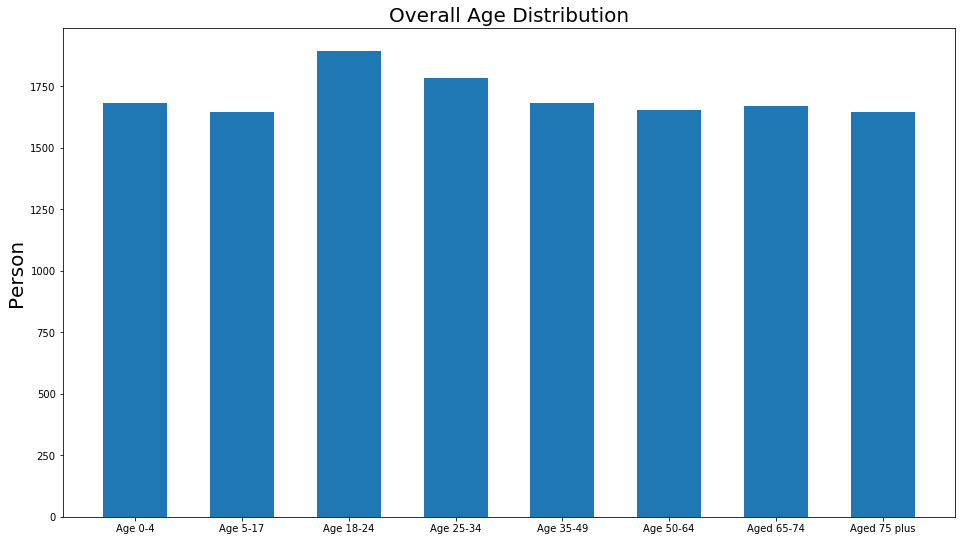

In [10]:
plt.figure(figsize=(16, 9))
plt.bar(x = 'REFERENCE', height = 'Total' ,data = acorn_age_prect, width = 0.6)
plt.title('Overall Age Distribution', fontsize = '20')
plt.ylabel('Person', fontsize = '20');
# plt.savefit('./Figs/Overall Age Distribution.svg');

In [11]:
x = acorn_age.T.iloc[1:]
x.columns = list(acorn_age.T.iloc[0])

In [12]:
x_total = x.copy()
x_total['Total'] = x_total.sum(axis = 1)
# x_total

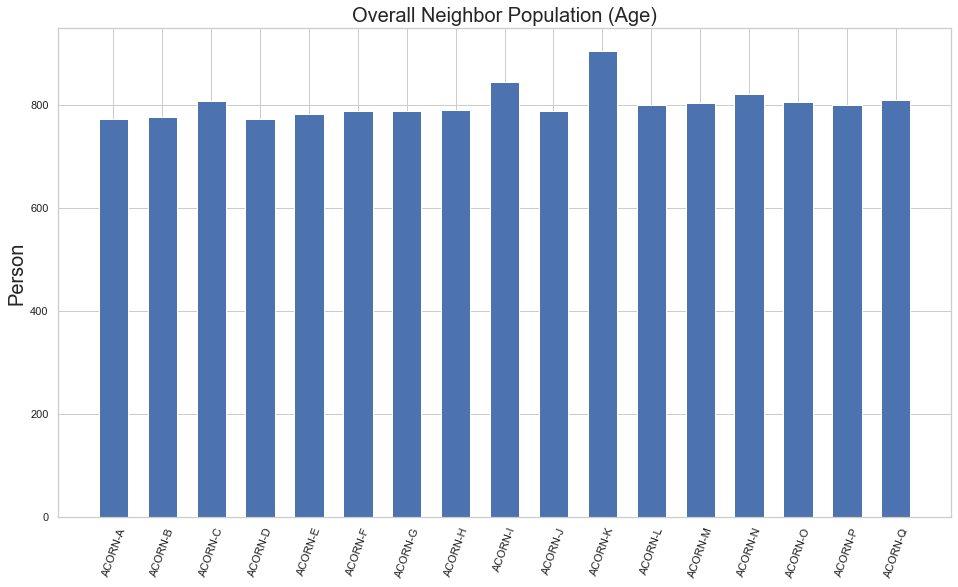

In [442]:
plt.figure(figsize=(16, 9))
plt.bar(x = x.index, height = 'Total' ,data = x_total, width = 0.6)
plt.title('Overall Neighbor Population (Age)', fontsize = '20')
plt.xticks(rotation = 70)
plt.ylabel('Person', fontsize = '20');
# plt.savefit('./Figs/Overall Neighbor Population_AGE.svg');

In [55]:
def PercentageDistributionHbar(df, title, savepic = False, ptext = False, percentage = True):
    
    #transpose dataframe
    x = df.T.iloc[1:]
    x.columns = list(df.T.iloc[0])
    
    #total column
    x_total = x.copy()
    x_total['Total'] = x_total.sum(axis = 1)
    
    plt.figure(figsize=(16, 9))
    columns = list(x.columns)

    prev_column = columns.pop(0) #first columns 
    
    #colormap
    category_colors = plt.get_cmap('tab20')(np.linspace(0, 1, 20)) #20 colors
#     print(category_colors)
    
    if percentage:
        width = x[prev_column]/x_total['Total']*100
    else:
        width = x[prev_column]
        
    plt.barh(x.index, width, color = category_colors[0] )  #plot the first bar
    
    if ptext:   #plot text  
      
        #text color
        r, g, b, _ = category_colors[0]
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        
        for i, w in enumerate(width):
            plt.text(w/2, i, str(int(w)), ha = 'center', va = 'center', color = text_color)

    
    if percentage:
        left = x[prev_column]/x_total['Total']*100
    else:
        left = x[prev_column]
        
    counter = 1
    for column in columns: 
        
        if percentage:
            width = x[column]/x_total['Total']*100
        else:
            width = x[column]
            
        plt.barh(x.index, width, left = left, color = category_colors[counter])
 
        #plot text
        if ptext:
            #text color
            r, g, b, _ = category_colors[counter]
            text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
            
            for i, (w, l) in enumerate(zip(width, left)):
                plt.text((w)/2+l, i, str(int(w)), ha = 'center', va = 'center', color = text_color)
            
        left += width
        counter +=1

    plt.xlabel('Percentage')
    plt.ylabel('Neighbors')
    plt.title(title, fontsize = '20', y = 1.075)
    plt.legend(labels = (x.columns), bbox_to_anchor = (0,1), ncol = len(x.columns), loc = 'lower left')
    
    #savefig
    if savepic:
        plt.savefig('./Figs/'+ title +'.SVG', bbox_inches="tight")
        
    plt.show()

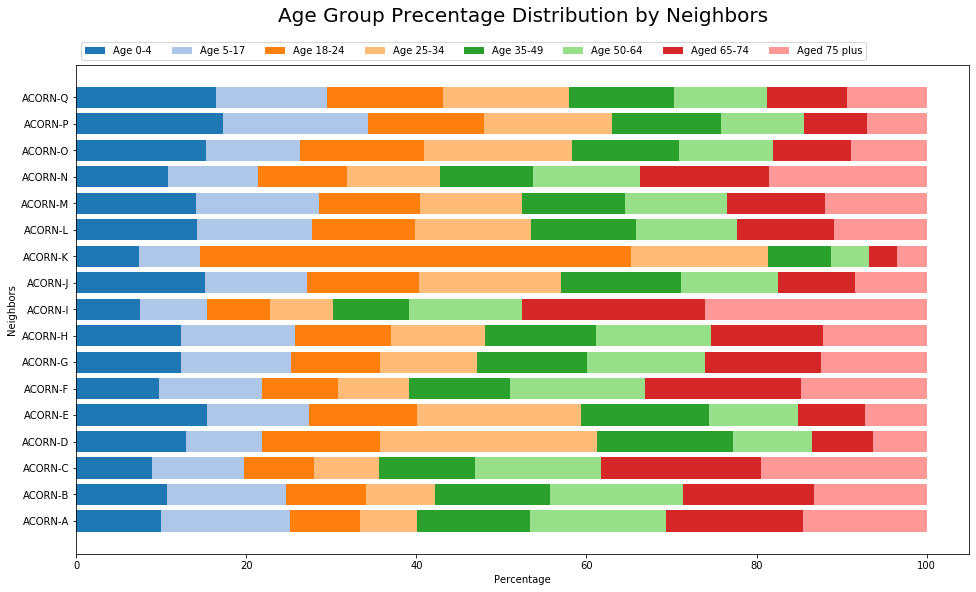

In [56]:
title = 'Age Group Precentage Distribution by Neighbors'
PercentageDistributionHbar(acorn_age,title,savepic = True, ptext=False, percentage = True)

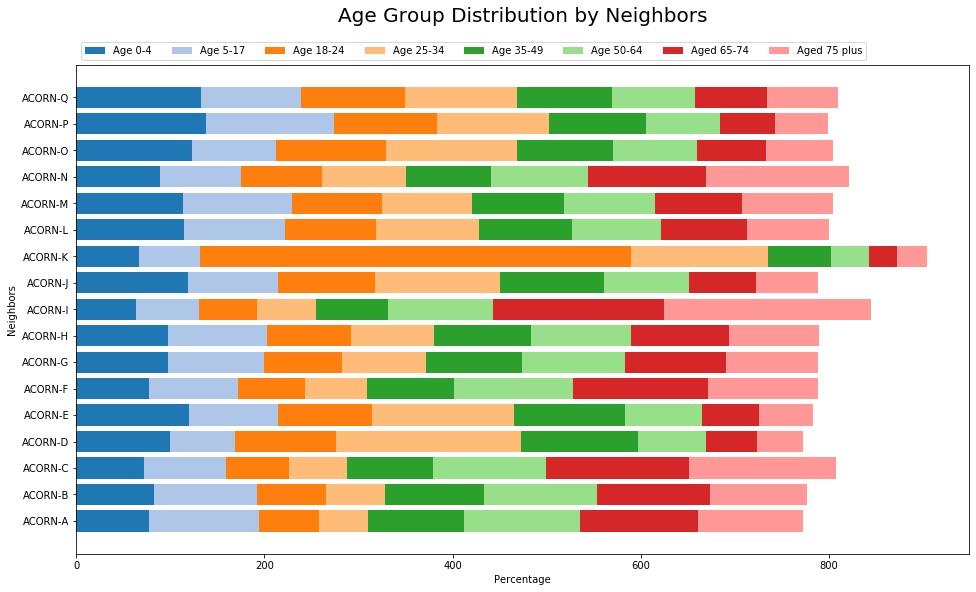

In [57]:
title = 'Age Group Distribution by Neighbors'
PercentageDistributionHbar(acorn_age,title,savepic = True, ptext=False, percentage = False)

## Ethnicity

In [36]:
acorn_ethnicity = acorn_details_df[acorn_details_df.CATEGORIES =='Ethnicity'].iloc[: ,2:]

In [37]:
acorn_ethnicity

,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
12,White,98.0,106.0,110.0,83.0,93.0,114.0,94.0,102.0,113.0,103.0,81.0,92.0,106.0,111.0,100.0,80.0,98.0
13,Mixed,117.0,79.0,55.0,248.0,149.0,27.0,84.0,90.0,38.0,116.0,175.0,73.0,88.0,48.0,104.0,193.0,137.0
14,Asian,107.0,67.0,34.0,102.0,116.0,8.0,212.0,89.0,21.0,71.0,159.0,276.0,55.0,24.0,102.0,154.0,79.0
15,Black,48.0,34.0,21.0,215.0,158.0,6.0,71.0,87.0,14.0,76.0,213.0,71.0,69.0,32.0,85.0,389.0,174.0
16,Other ethnicity,174.0,84.0,47.0,304.0,168.0,18.0,105.0,76.0,30.0,81.0,327.0,86.0,52.0,34.0,99.0,179.0,94.0


In [58]:
# convert datatype (from object to float)
acorn_ethnicity = acorn_ethnicity.iloc[:,:1].join(acorn_ethnicity.iloc[:,1:].astype('float'))

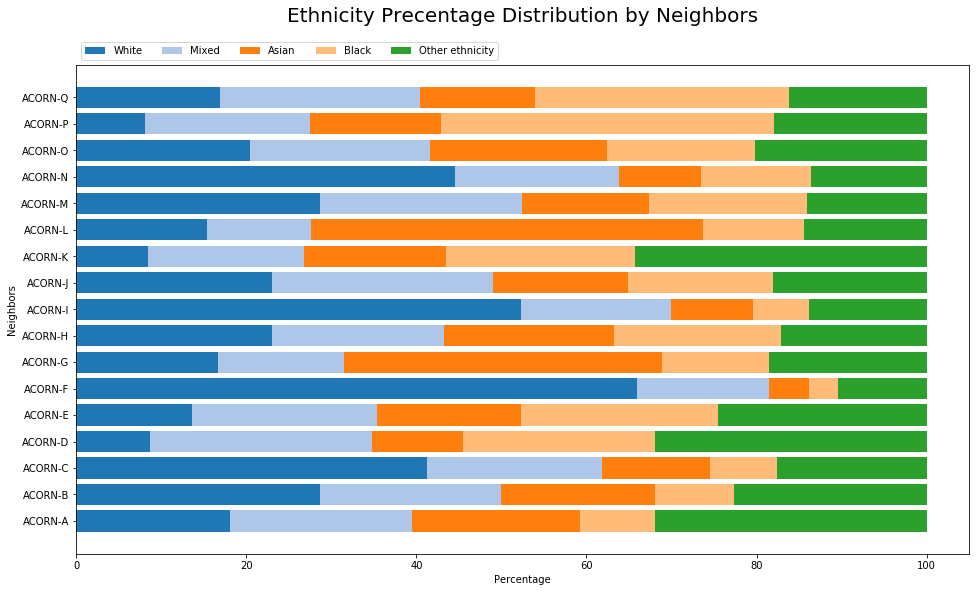

In [59]:
title = 'Ethnicity Precentage Distribution by Neighbors'
PercentageDistributionHbar(acorn_ethnicity,title,savepic = True, ptext=False, percentage = True)

In [579]:
# title = 'Ethnicity Distribution by Neighbors'
# PercentageDistributionHbar(acorn_ethnicity,title,savepic = True, ptext=False, percentage = False)

## Religions

In [355]:
acorn_religions = acorn_details_df[acorn_details_df.CATEGORIES =='Religion'].iloc[: ,2:]

In [356]:
# convert datatype (from object to float)
acorn_religions = acorn_religions.iloc[:,:1].join(acorn_religions.iloc[:,1:].astype('float'))

In [580]:
x = acorn_religions.T.iloc[1:]
x.columns = list(acorn_religions.T.iloc[0])
# x

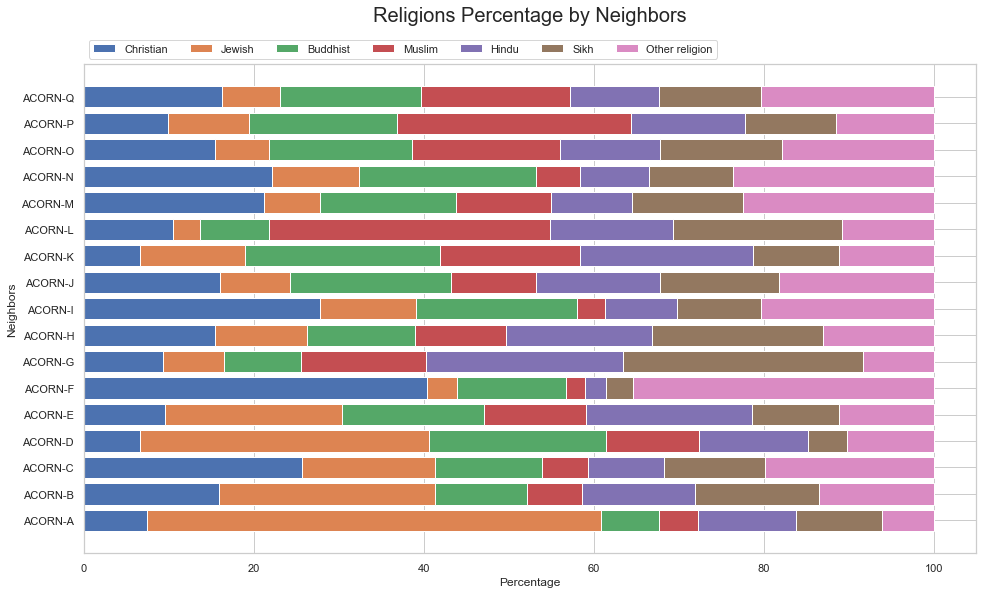

In [578]:
title = 'Religions Percentage by Neighbors'
PercentageDistributionHbar(acorn_religions,title,savepic = False, ptext=False, percentage = True)

In [362]:
acorn_details_df['MAIN CATEGORIES'].unique()

array(['POPULATION', 'HOUSING', 'FAMILY', 'ECONOMY', 'EDUCATION',
       'HEALTH', 'TRANSPORT', 'MARKETING CHANNELS', 'FINANCE', 'DIGITAL',
       'SHOPPING', 'CONTACT', 'ENVIRONMENT', 'COMMUNITY SAFETY',
       'LEISURE TIME'], dtype=object)

# Housing

In [575]:
acorn_details_df[acorn_details_df['MAIN CATEGORIES']=='HOUSING'].head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
35,HOUSING,House Type,Bungalow,118.0,100.0,198.0,51.0,51.0,167.0,94.0,74.0,410.0,55.0,61.0,64.0,64.0,64.0,45.0,50.0,50.0
36,HOUSING,House Type,Detached house,431.0,419.0,229.0,46.0,98.0,287.0,203.0,59.0,138.0,61.0,38.0,32.0,25.0,24.0,20.0,19.0,13.0
37,HOUSING,House Type,Flat or maisonette,36.0,25.0,47.0,274.0,196.0,17.0,22.0,17.0,54.0,30.0,299.0,49.0,29.0,159.0,160.0,142.0,277.0
38,HOUSING,House Type,Semi-detached house,56.0,70.0,139.0,36.0,66.0,119.0,96.0,192.0,172.0,102.0,33.0,72.0,139.0,125.0,39.0,92.0,52.0
39,HOUSING,House Type,Terraced house,23.0,20.0,25.0,86.0,77.0,38.0,103.0,71.0,31.0,163.0,77.0,199.0,140.0,72.0,169.0,123.0,83.0


## House Value

In [60]:
acorn_HouseValue = acorn_details_df[acorn_details_df.CATEGORIES =='House Value'].iloc[: ,2:]

In [61]:
acorn_HouseValue

,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
51,House Value up to 100k,13.0,17.0,16.0,38.0,40.0,35.0,36.0,35.0,36.0,37.0,144.0,180.0,159.0,205.0,252.0,226.0,326.0
52,House Value 100k-150k,35.0,32.0,46.0,40.0,85.0,89.0,77.0,133.0,163.0,112.0,152.0,149.0,142.0,204.0,123.0,78.0,103.0
53,House Value 150k-250k,42.0,66.0,117.0,39.0,83.0,144.0,154.0,143.0,145.0,193.0,91.0,90.0,85.0,65.0,59.0,58.0,62.0
54,House Value 250k-500k,76.0,161.0,146.0,123.0,136.0,119.0,107.0,88.0,69.0,62.0,82.0,65.0,86.0,41.0,59.0,98.0,24.0
55,House Value 500k-750k,111.0,268.0,164.0,174.0,184.0,68.0,99.0,92.0,90.0,52.0,26.0,25.0,24.0,25.0,46.0,57.0,48.0
56,House Value 750k-1m,156.0,317.0,201.0,89.0,94.0,41.0,44.0,41.0,42.0,43.0,49.0,48.0,46.0,48.0,84.0,82.0,89.0
57,House Value 1m+,1805.0,124.0,56.0,1002.0,111.0,43.0,47.0,43.0,44.0,45.0,31.0,30.0,29.0,30.0,36.0,35.0,38.0


In [62]:
# convert datatype (from object to float)
acorn_HouseValue = acorn_HouseValue.iloc[:,:1].join(acorn_HouseValue.iloc[:,1:].astype('float'))

In [63]:
x = acorn_HouseValue.T.iloc[1:]
x.columns = list(acorn_HouseValue.T.iloc[0])
x.head(3)

,House Value up to 100k,House Value 100k-150k,House Value 150k-250k,House Value 250k-500k,House Value 500k-750k,House Value 750k-1m,House Value 1m+
ACORN-A,13,35,42,76,111,156,1805
ACORN-B,17,32,66,161,268,317,124
ACORN-C,16,46,117,146,164,201,56


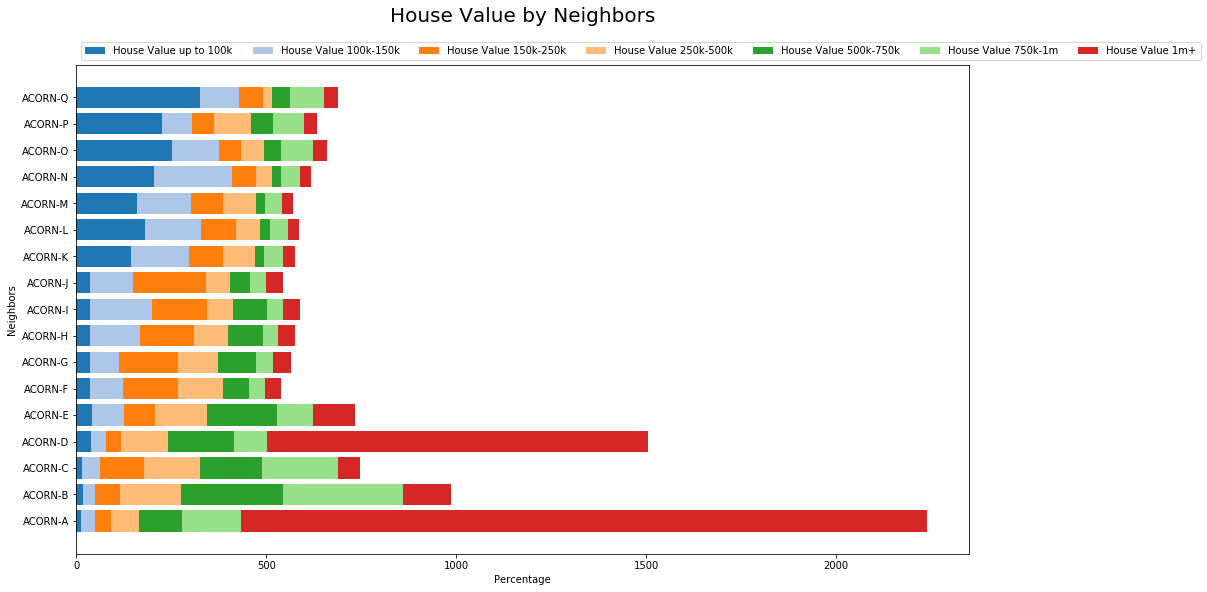

In [64]:
title = 'House Value by Neighbors'
PercentageDistributionHbar(acorn_HouseValue,title,savepic = False, ptext=False, percentage = False)

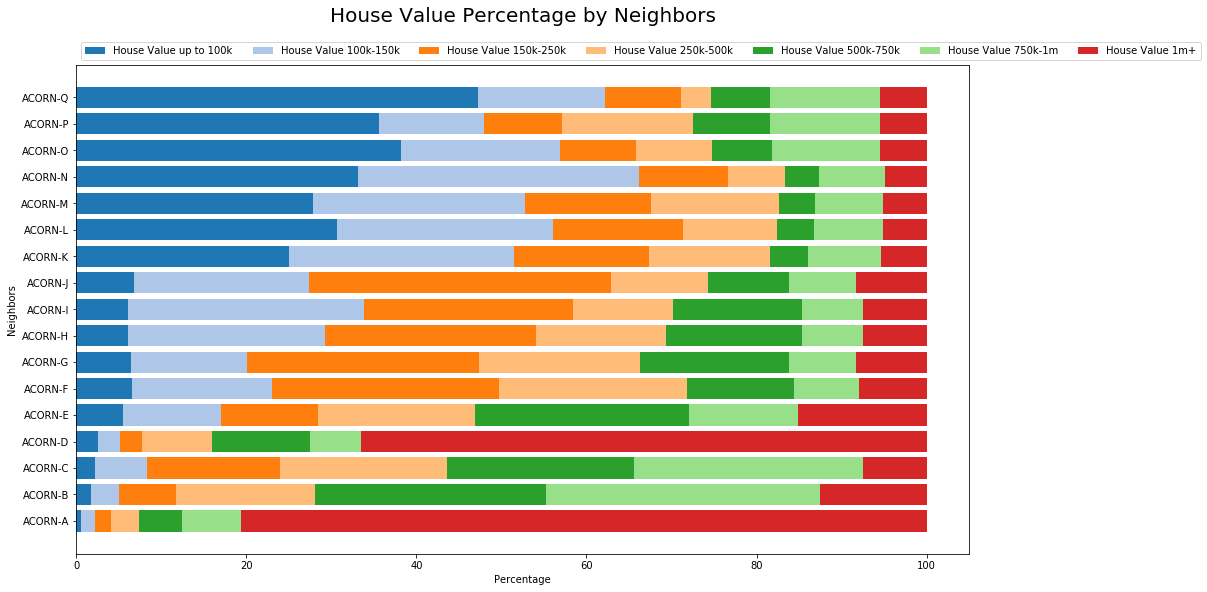

In [65]:
title = 'House Value Percentage by Neighbors'
PercentageDistributionHbar(acorn_HouseValue,title,savepic = False, ptext=False, percentage = True)

## Family

In [451]:
acorn_details_df[acorn_details_df['MAIN CATEGORIES']=='FAMILY']

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
59,FAMILY,Structure,Couple family no children,112.0,124.0,113.0,115.0,118.0,132.0,108.0,104.0,89.0,117.0,83.0,90.0,87.0,69.0,90.0,60.0,62.0
60,FAMILY,Structure,Couple family with dependent children,146.0,140.0,101.0,70.0,106.0,108.0,115.0,116.0,61.0,104.0,52.0,104.0,98.0,61.0,75.0,85.0,65.0
61,FAMILY,Structure,Lone parent family with dependent children,30.0,48.0,52.0,59.0,85.0,58.0,75.0,80.0,48.0,103.0,68.0,106.0,146.0,124.0,128.0,223.0,218.0
62,FAMILY,Structure,All pensioner households,119.0,105.0,159.0,55.0,51.0,133.0,97.0,101.0,245.0,63.0,37.0,88.0,92.0,186.0,70.0,56.0,70.0
63,FAMILY,Structure,All student households,16.0,23.0,15.0,224.0,141.0,5.0,44.0,30.0,10.0,117.0,1821.0,60.0,29.0,17.0,109.0,87.0,52.0
64,FAMILY,Structure,One person household (non-pensioner),57.0,59.0,64.0,174.0,139.0,67.0,78.0,67.0,54.0,127.0,198.0,101.0,90.0,93.0,176.0,114.0,174.0
65,FAMILY,Structure,Other household structure,86.0,87.0,75.0,112.0,98.0,71.0,110.0,118.0,60.0,93.0,96.0,117.0,118.0,80.0,90.0,147.0,98.0
66,FAMILY,Children in household,Children at home : 0,106.0,101.0,111.0,108.0,97.0,109.0,101.0,98.0,122.0,100.0,117.0,98.0,93.0,114.0,100.0,81.0,97.0
67,FAMILY,Children in household,Children at home : 1,84.0,88.0,76.0,90.0,120.0,79.0,98.0,101.0,62.0,107.0,78.0,108.0,105.0,76.0,116.0,122.0,113.0
68,FAMILY,Children in household,Children at home : 2,103.0,118.0,89.0,82.0,101.0,91.0,105.0,112.0,54.0,100.0,58.0,99.0,116.0,63.0,88.0,132.0,95.0


## Structure

In [66]:
acorn_family_structure = acorn_details_df[acorn_details_df.CATEGORIES =='Structure'].iloc[: ,2:]
# acorn_family_structure

In [67]:
acorn_family_structure = ConvertDtype(acorn_family_structure, 'float')
# acorn_family_structure

In [68]:
acorn_family_structure_prect = acorn_family_structure.copy()
acorn_family_structure_prect['Total'] = acorn_family_structure_prect.sum(axis = 1)

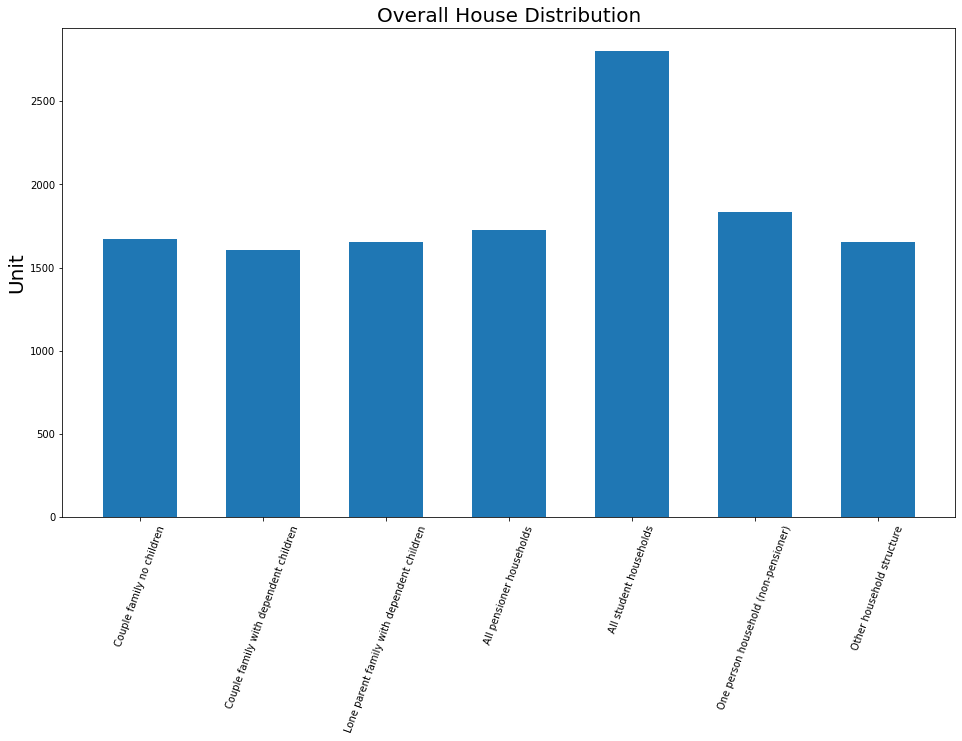

In [69]:
plt.figure(figsize=(16, 9))
plt.bar(x = 'REFERENCE', height = 'Total' ,data = acorn_family_structure_prect, width = 0.6)
plt.title('Overall House Distribution', fontsize = '20')
plt.xticks(rotation = 70)
plt.ylabel('Unit', fontsize = '20');
# plt.savefit('./Figs/Overall Age Distribution.svg');

In [70]:
x = acorn_family_structure.T.iloc[1:]
x.columns = list(acorn_family_structure.T.iloc[0])

In [71]:
x_total = x.copy()
x_total['Total'] = x_total.sum(axis = 1)
# x_total

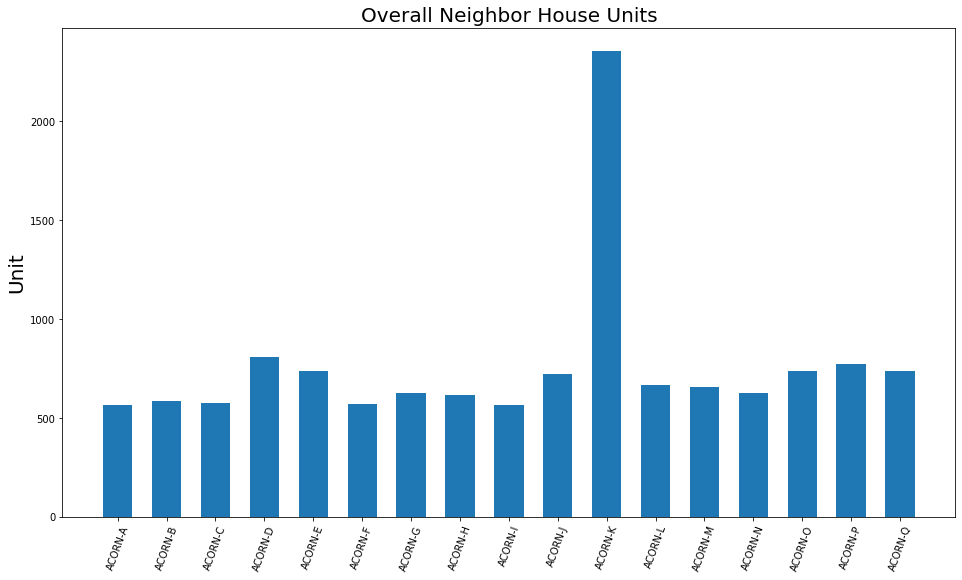

In [72]:
plt.figure(figsize=(16, 9))
plt.bar(x = x.index, height = 'Total' ,data = x_total, width = 0.6)
plt.title('Overall Neighbor House Units', fontsize = '20')
plt.xticks(rotation = 70)
plt.ylabel('Unit', fontsize = '20');
# plt.savefit('./Figs/Overall Neighbor Population_AGE.svg');

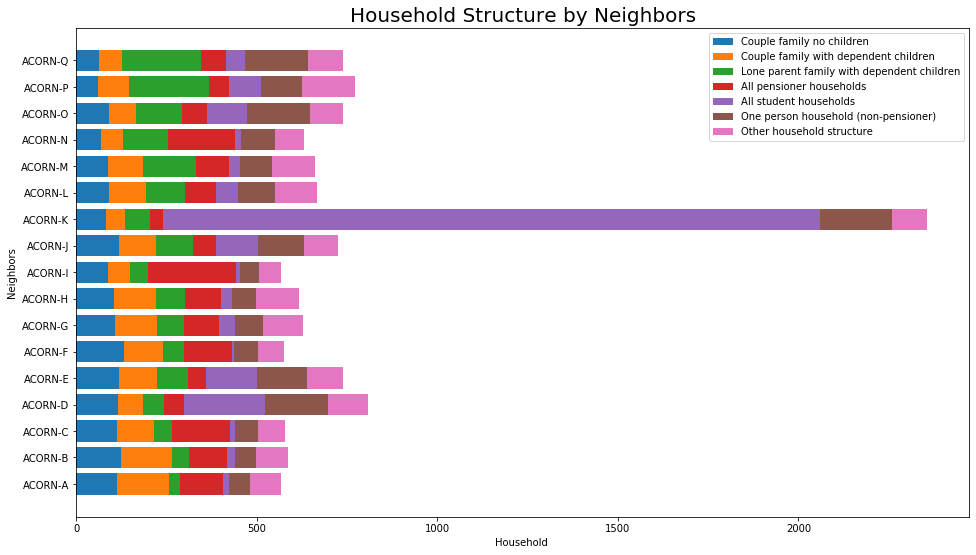

In [73]:
plt.figure(figsize=(16, 9))
columns = list(x.columns)

prev_column = columns.pop(0) #first columns 

#plot the first bar
#remove white space in between texts
plt.barh(x.index, x[prev_column]) 

left = x[prev_column]
for column in columns: 

    plt.barh(x.index, x[column], left = left)
    left += x[column]

plt.xlabel('Household ')
plt.ylabel('Neighbors')
plt.title('Household Structure by Neighbors',fontsize = '20')
plt.legend((x.columns))
# plt.savefig('./Figs/AHousehold Structure by Neighbors.svg')
plt.show()

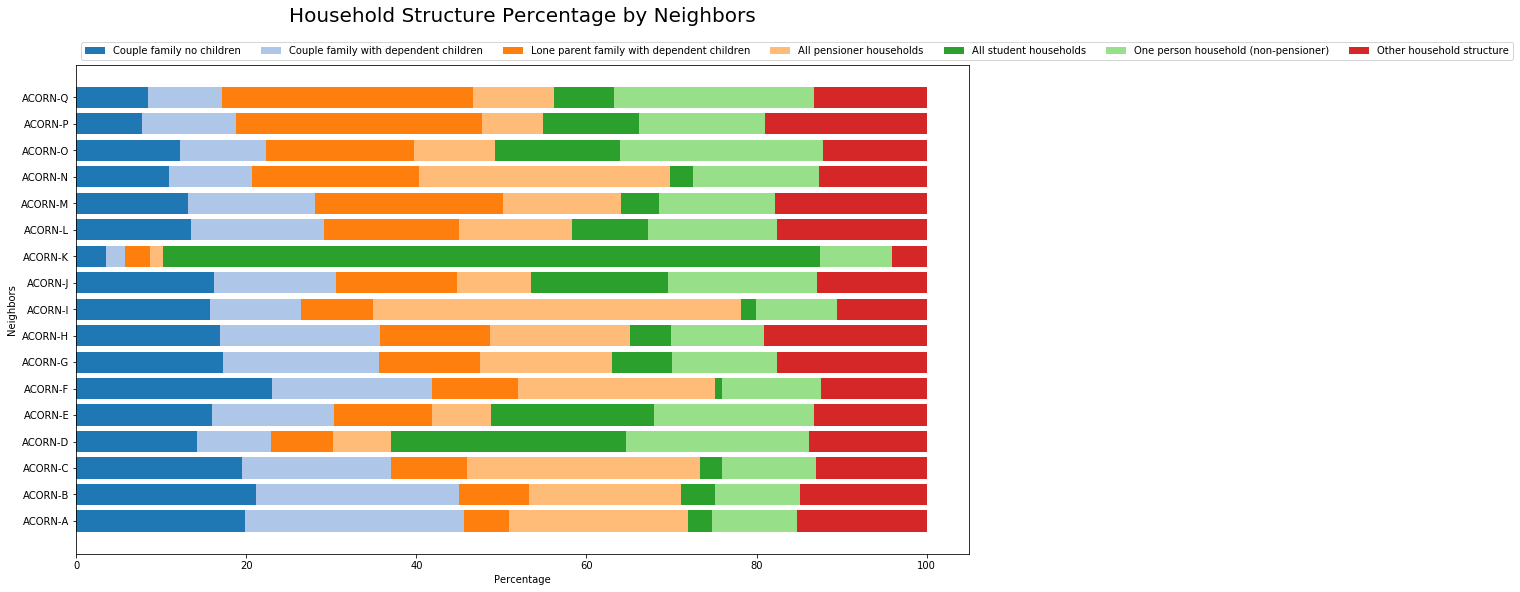

In [74]:
title = 'Household Structure Percentage by Neighbors'
PercentageDistributionHbar(acorn_family_structure,title,savepic = False, ptext=False, percentage = True)

## ECONOMY

In [75]:
acorn_details_df[acorn_details_df['MAIN CATEGORIES']=='ECONOMY'].head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
74,ECONOMY,Economic Activity,Employee Full-Time,93.0,107.0,96.0,128.0,128.0,91.0,107.0,110.0,82.0,124.0,78.0,100.0,97.0,74.0,106.0,81.0,76.0
75,ECONOMY,Economic Activity,Employee Part-Time,87.0,103.0,103.0,58.0,85.0,105.0,105.0,113.0,94.0,101.0,51.0,109.0,113.0,93.0,99.0,103.0,100.0
76,ECONOMY,Economic Activity,Self-employed,169.0,132.0,120.0,144.0,109.0,158.0,110.0,94.0,74.0,91.0,61.0,83.0,77.0,57.0,75.0,77.0,58.0
77,ECONOMY,Economic Activity,Retired,111.0,106.0,154.0,40.0,49.0,135.0,98.0,98.0,244.0,62.0,26.0,90.0,92.0,199.0,72.0,58.0,81.0
78,ECONOMY,Economic Activity,Unemployed and seeking work,29.0,42.0,46.0,81.0,82.0,46.0,72.0,79.0,60.0,90.0,102.0,122.0,132.0,127.0,163.0,200.0,234.0


In [77]:
acorn_econ = acorn_details_df[acorn_details_df.CATEGORIES =='Economic Activity'].iloc[: ,2:]

In [78]:
acorn_econ = ConvertDtype(acorn_econ, 'float')
# acorn_econ

In [79]:
acorn_econ_prect = acorn_econ.copy()
acorn_econ_prect['Total'] = acorn_econ_prect.sum(axis = 1)

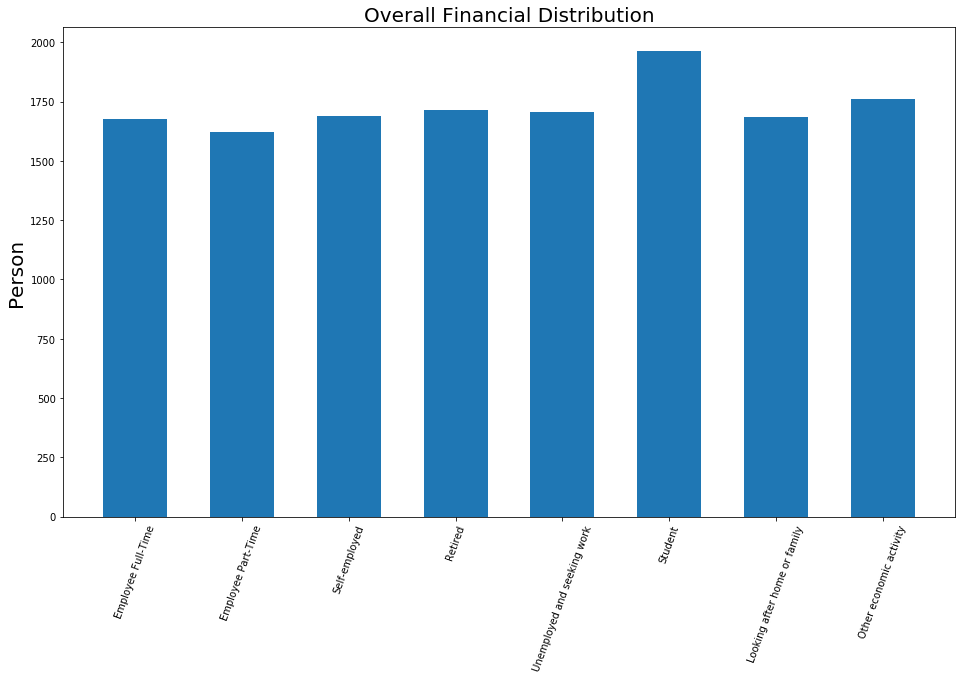

In [80]:
plt.figure(figsize=(16, 9))
plt.bar(x = 'REFERENCE', height = 'Total' ,data = acorn_econ_prect, width = 0.6)
plt.title('Overall Financial Distribution', fontsize = '20')
plt.xticks(rotation = 70)
plt.ylabel('Person', fontsize = '20');
# plt.savefit('./Figs/Overall Financial Distribution.svg');

In [81]:
x = acorn_econ.T.iloc[1:]
x.columns = list(acorn_econ.T.iloc[0])

In [82]:
x_total = x.copy()
x_total['Total'] = x_total.sum(axis = 1)
# x_total

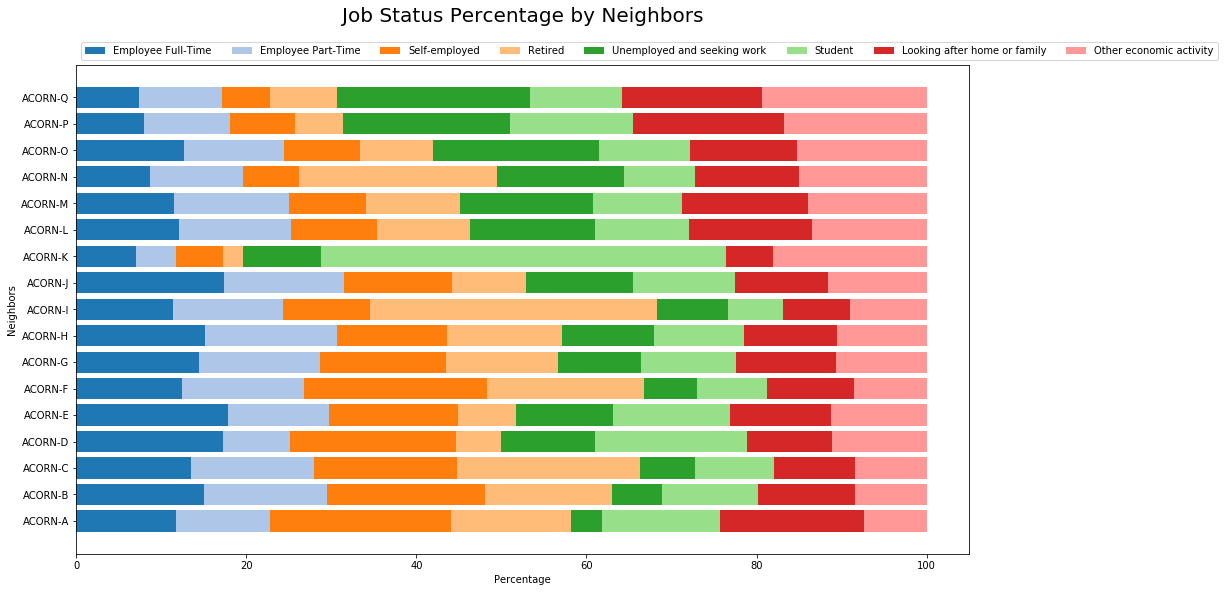

In [83]:
title = 'Job Status Percentage by Neighbors'
PercentageDistributionHbar(acorn_econ,title,savepic = False, ptext=False, percentage = True)

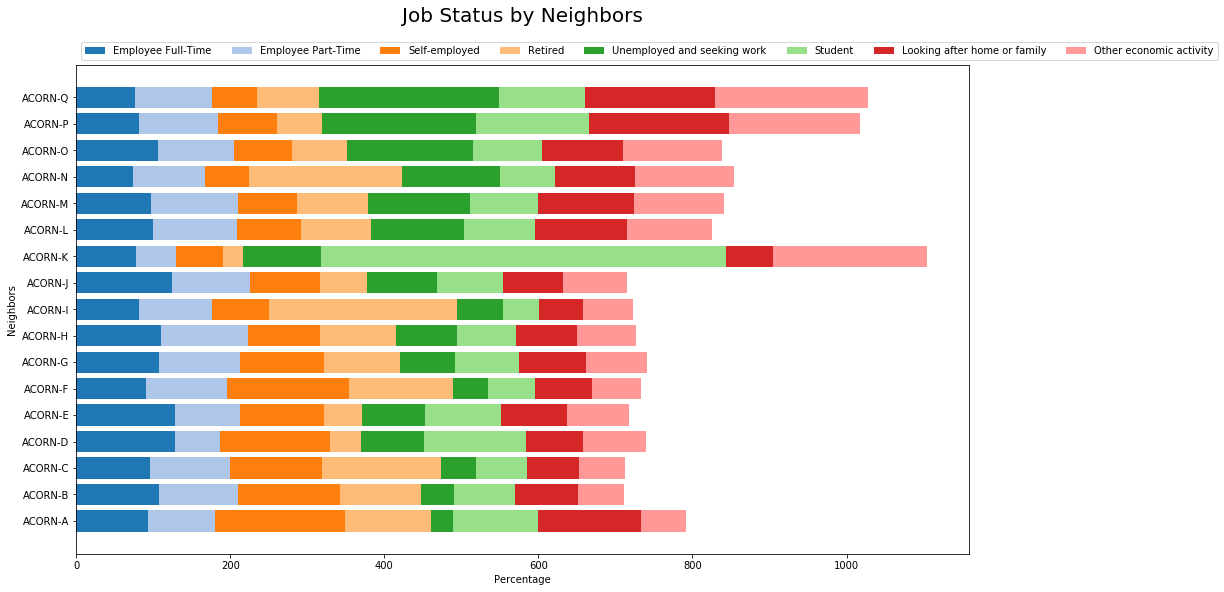

In [84]:
title = 'Job Status by Neighbors'
PercentageDistributionHbar(acorn_econ,title,savepic = False, ptext=False, percentage = False)

## FINANCE - HouseHold Income

In [85]:
acorn_details_df['MAIN CATEGORIES'].unique()

array(['POPULATION', 'HOUSING', 'FAMILY', 'ECONOMY', 'EDUCATION',
       'HEALTH', 'TRANSPORT', 'MARKETING CHANNELS', 'FINANCE', 'DIGITAL',
       'SHOPPING', 'CONTACT', 'ENVIRONMENT', 'COMMUNITY SAFETY',
       'LEISURE TIME'], dtype=object)

In [103]:
acorn_details_df[acorn_details_df['MAIN CATEGORIES']=='FINANCE'].head(6)

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
186,FINANCE,Household Annual Income,"£0-£20,000",19.0,30.0,65.0,43.0,55.0,78.0,60.0,73.0,131.0,70.0,115.0,111.0,129.0,219.0,134.0,154.0,218.0
187,FINANCE,Household Annual Income,"£20,000-£40,000",49.0,69.0,101.0,79.0,95.0,111.0,101.0,109.0,114.0,108.0,118.0,120.0,117.0,76.0,119.0,112.0,82.0
188,FINANCE,Household Annual Income,"£40,000-£60,000",112.0,127.0,123.0,125.0,131.0,119.0,130.0,124.0,80.0,128.0,94.0,97.0,84.0,33.0,79.0,64.0,28.0
189,FINANCE,Household Annual Income,"£60,000-£80,000",200.0,189.0,134.0,170.0,152.0,113.0,142.0,121.0,58.0,125.0,66.0,69.0,55.0,14.0,47.0,35.0,10.0
190,FINANCE,Household Annual Income,"£80,000-£100,000",304.0,247.0,138.0,209.0,160.0,100.0,140.0,108.0,42.0,110.0,44.0,45.0,34.0,6.0,27.0,20.0,4.0
191,FINANCE,Household Annual Income,"£100,000+",511.0,332.0,131.0,267.0,152.0,74.0,119.0,80.0,24.0,78.0,24.0,22.0,16.0,2.0,11.0,9.0,1.0


In [87]:
acorn_HSIncome = acorn_details_df[acorn_details_df.CATEGORIES =='Household Annual Income'].iloc[: ,2:]

In [96]:
acorn_HSIncome = acorn_HSIncome.iloc[:-1]

In [97]:
acorn_HSIncome = ConvertDtype(acorn_HSIncome, 'float')
# acorn_HSIncome

In [98]:
acorn_HSIncome_prect = acorn_HSIncome.copy()
acorn_HSIncome_prect['Total'] = acorn_HSIncome_prect.sum(axis = 1)
# acorn_HSIncome_prect

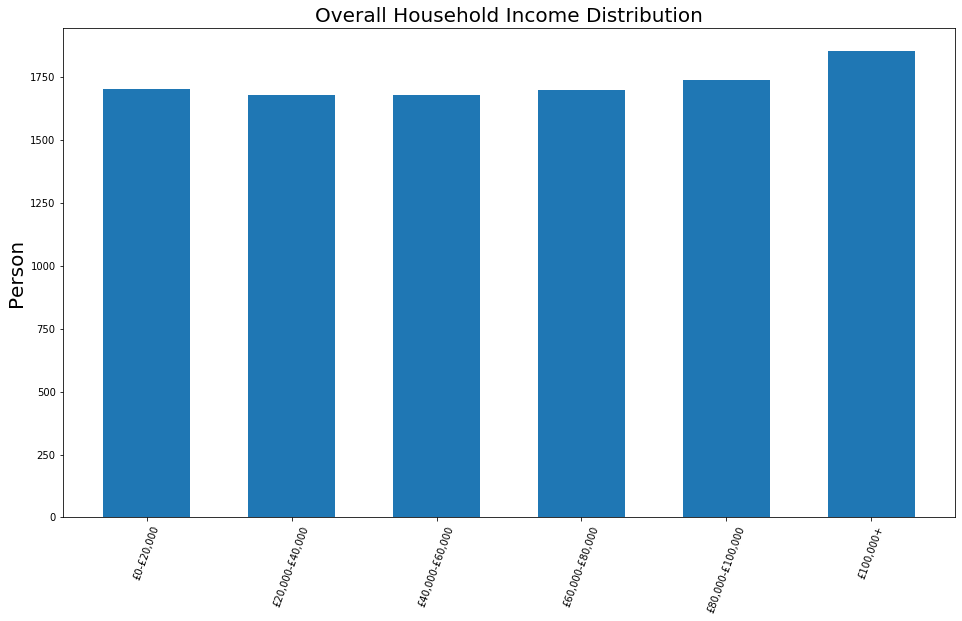

In [99]:
plt.figure(figsize=(16, 9))
plt.bar(x = 'REFERENCE', height = 'Total' ,data = acorn_HSIncome_prect, width = 0.6)
plt.title('Overall Household Income Distribution', fontsize = '20')
plt.xticks(rotation = 70)
plt.ylabel('Person', fontsize = '20');
# plt.savefit('./Figs/Overall Financial Distribution.svg');

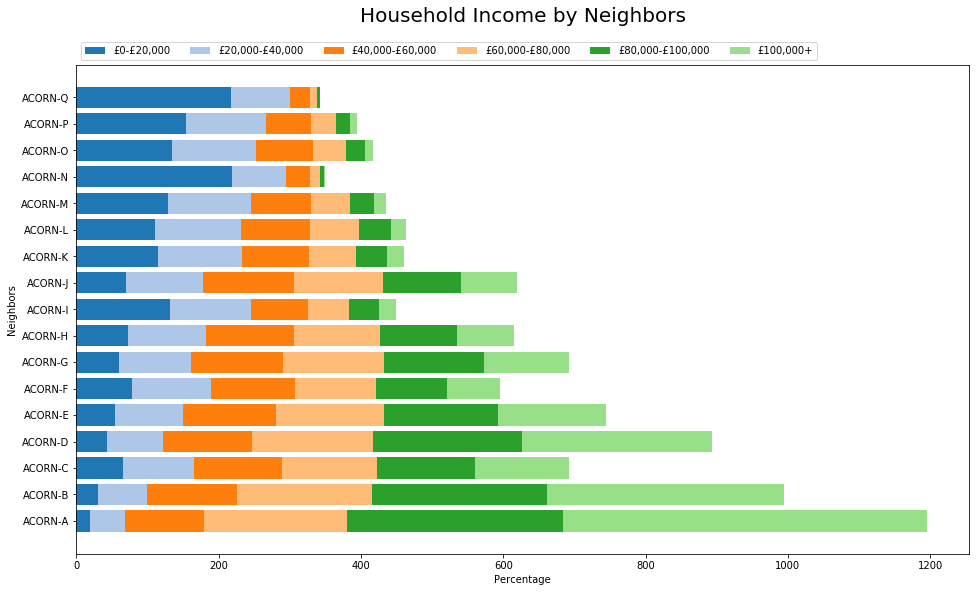

In [100]:
title = 'Household Income by Neighbors'
PercentageDistributionHbar(acorn_HSIncome,title,savepic = False, ptext=False, percentage = False)

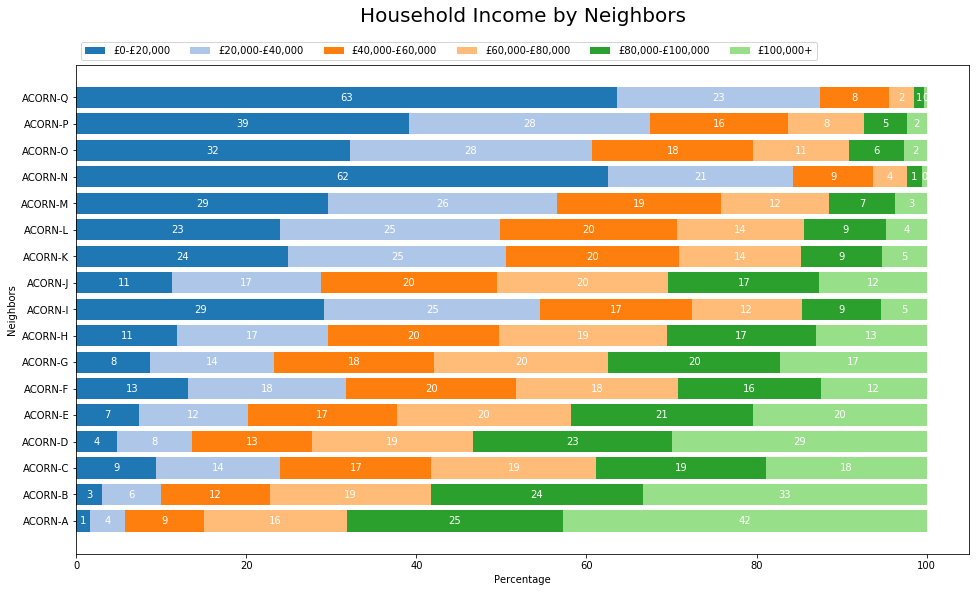

In [106]:
title = 'Household Income by Neighbors'
PercentageDistributionHbar(acorn_HSIncome,title,savepic = False, ptext=True, percentage = True)

In [101]:
acorn_details_df['MAIN CATEGORIES'].unique()

array(['POPULATION', 'HOUSING', 'FAMILY', 'ECONOMY', 'EDUCATION',
       'HEALTH', 'TRANSPORT', 'MARKETING CHANNELS', 'FINANCE', 'DIGITAL',
       'SHOPPING', 'CONTACT', 'ENVIRONMENT', 'COMMUNITY SAFETY',
       'LEISURE TIME'], dtype=object)

In [102]:
acorn_details_df[acorn_details_df['MAIN CATEGORIES']=='LEISURE TIME'].head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
734,LEISURE TIME,Daily Newspapers,Daily Express,113.0,117.0,127.0,71.0,71.0,114.0,114.0,114.0,170.0,95.0,59.0,100.0,89.0,96.0,80.0,80.0,80.0
735,LEISURE TIME,Daily Newspapers,Daily Star,49.0,42.0,49.0,63.0,66.0,82.0,66.0,91.0,82.0,65.0,111.0,112.0,146.0,150.0,150.0,150.0,150.0
736,LEISURE TIME,Daily Newspapers,The Sun,49.0,49.0,54.0,73.0,81.0,81.0,85.0,100.0,92.0,92.0,59.0,123.0,135.0,138.0,115.0,131.0,152.0
737,LEISURE TIME,Daily Newspapers,The Times,476.0,180.0,155.0,216.0,169.0,94.0,94.0,81.0,89.0,109.0,113.0,59.0,51.0,38.0,70.0,69.0,60.0
738,LEISURE TIME,Daily Newspapers,Daily Mail,139.0,139.0,143.0,80.0,97.0,120.0,119.0,118.0,143.0,98.0,68.0,84.0,83.0,82.0,78.0,58.0,62.0
